In [5]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
eval_May04_1439_22447097.log

Haven't read it yet but might be useful: https://arxiv.org/pdf/1904.06979.pdf

Using Welch's t-test for now
TODO: confirm if it's right

In [2]:
episode_rewards = np.asarray([-0.77648341, -0.77648341,  0.        , -0.84545385, -0.60473464,
       -0.60473464,  0.        , -0.62770281, -0.83607652, -0.83607652,
        0.        , -0.81167945, -0.50230277, -0.50230277,  0.        ,
       -0.50768057, -0.37690899, -0.37690899,  0.        , -0.37139904,
       -0.76003052, -0.76003052,  0.        , -0.71406728, -0.63670099,
       -0.63670099,  0.        , -0.62312957, -0.58986421, -0.58986421,
        0.        , -0.65778797, -0.15371678, -0.15371678,  0.        ,
       -0.17047249, -0.74463809, -0.74463809,  0.        , -0.72543085,
       -0.32895744, -0.32895744,  0.        , -0.36301456, -0.78510779,
       -0.78510779,  0.        , -0.82559714])

In [17]:
eps = int(len(episode_rewards)/4)

In [95]:
sample1 = episode_rewards.reshape((eps,4)).sum(axis=1)

In [96]:
sample2 = episode_rewards.reshape((eps,4)).sum(axis=1)

In [ ]:
# Hypothesis
# Null Hypothesis is that reward from a model trained on one strategy is performs the same on the other strategy that it was not trained on
# H0: μ1 = μ2
# Alternate Hypothesis is that reward is the same, i.e. strategy didn't have any effect on training
# Ha: μ2 ≠ μ1

In [97]:
s, p = scipy.stats.ttest_ind(
    sample1,
    sample2, 
    equal_var=False # Not sure
)

In [98]:
s,p

(0.0, 1.0)

In [33]:
strats = ["evasive", "hiding", "shifty"]

In [60]:
reward_dict = {s: {s: None for s in strats} for s in strats}


In [81]:
stats = {}
for model_strat in strats:
    for s1_player_strat in strats:
            for s2_player_strat in strats:
                sample1 = reward_dict[model_strat][s1_player_strat]
                sample2 = reward_dict[model_strat][s2_player_strat]
                stats.update({f"m{model_strat[0]}p{s1_player_strat[0]}_vs_m{model_strat[0]}p{s2_player_strat[0]}": None})
stats

{'mepe_vs_mepe': None,
 'mepe_vs_meph': None,
 'mepe_vs_meps': None,
 'meph_vs_mepe': None,
 'meph_vs_meph': None,
 'meph_vs_meps': None,
 'meps_vs_mepe': None,
 'meps_vs_meph': None,
 'meps_vs_meps': None,
 'mhpe_vs_mhpe': None,
 'mhpe_vs_mhph': None,
 'mhpe_vs_mhps': None,
 'mhph_vs_mhpe': None,
 'mhph_vs_mhph': None,
 'mhph_vs_mhps': None,
 'mhps_vs_mhpe': None,
 'mhps_vs_mhph': None,
 'mhps_vs_mhps': None,
 'mspe_vs_mspe': None,
 'mspe_vs_msph': None,
 'mspe_vs_msps': None,
 'msph_vs_mspe': None,
 'msph_vs_msph': None,
 'msph_vs_msps': None,
 'msps_vs_mspe': None,
 'msps_vs_msph': None,
 'msps_vs_msps': None}

In [11]:
for k1,v1 in aa.items():
    for k2,v2 in v1.items():
        # print(v2)
        print(k2, np.asarray(v2).flatten().shape)

random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (50,)
evasive (50,)
hiding (50,)
shifty (50,)
multiple (50,)
random (0,)
evasive (0,)
hiding (0,)
shifty (0,)
multiple (0,)


# Debugging t-test

In [6]:
import json

with open("../logs/play_time/eval_May04_1445_54495585.log_rewards.json") as f:
#with open("../logs/long_time/eval_May04_1439_22447097.log_rewards.json") as f:
    reward_dict = json.load(f)

In [7]:
from pprint import pprint

results_stats = {}
data_arrays = {}
for model_strat in reward_dict:
    data_arrays[model_strat] = {}
    for test_strat in reward_dict[model_strat]:
        if len(reward_dict[model_strat][test_strat]) == 0:
            continue
        scores = np.array(reward_dict[model_strat][test_strat]).flatten()
        data_arrays[model_strat][test_strat] = scores
        results_stats[model_strat + "_vs_" + test_strat] = (np.mean(scores), np.std(scores))
        #print(model_strat + "_vs_" + test_strat, results_stats[model_strat + "_vs_" + test_strat])
    #print("\n")
pprint(results_stats)

{'evasive_vs_evasive': (-0.7090719385147405, 0.2924127984579027),
 'evasive_vs_hiding': (-0.5713029572911978, 0.25063495579700523),
 'evasive_vs_random': (-0.7084534646855682, 0.3332854996419429),
 'evasive_vs_shifty': (-0.7744084144440179, 0.3319237529207017),
 'hiding_vs_evasive': (-0.7482336465971221, 0.21495098626133388),
 'hiding_vs_hiding': (-0.6173602409938725, 0.22584656493227434),
 'hiding_vs_random': (-0.8381487930865368, 0.2196403624670122),
 'hiding_vs_shifty': (-0.9710497248100175, 0.2792507589152462),
 'multiple_vs_evasive': (-1.0112644517230427, 1.06372935704414),
 'multiple_vs_hiding': (-0.8366061684123336, 0.8027812345357821),
 'multiple_vs_random': (-0.9877949031386695, 1.0057507124683387),
 'multiple_vs_shifty': (-1.069927388759576, 0.8010046528275734),
 'random_vs_evasive': (-2.59243434382266, 5.977951519409352),
 'random_vs_hiding': (-2.2582437143917944, 5.925215166552555),
 'random_vs_random': (-2.421233807265254, 5.945682498499511),
 'random_vs_shifty': (-2.61085

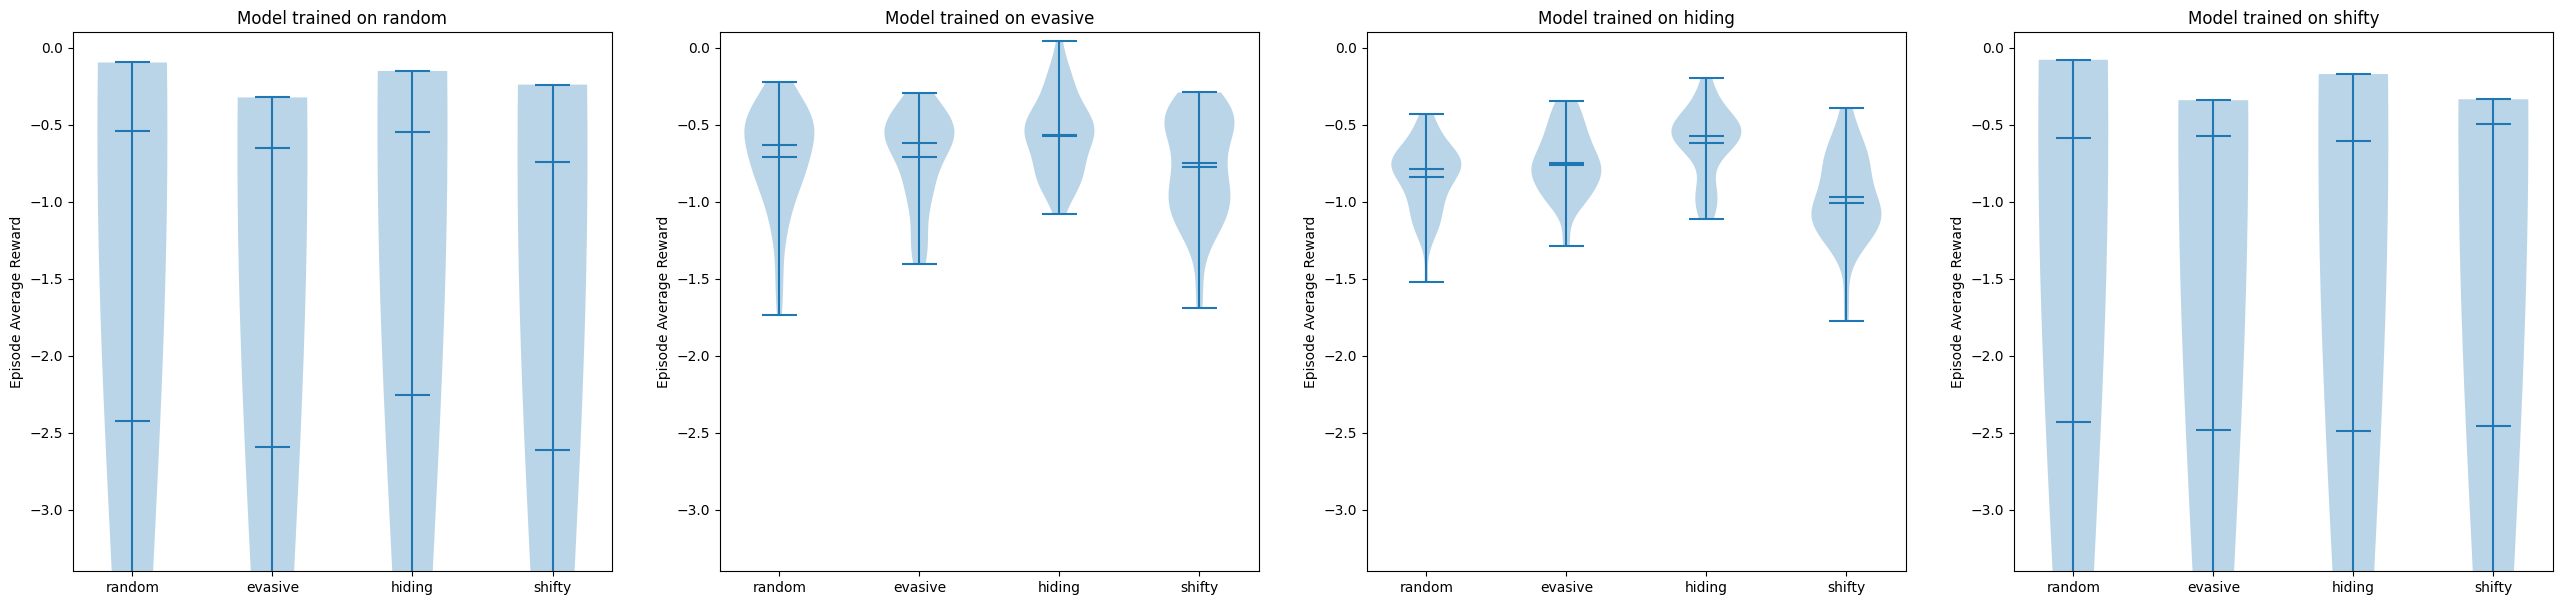

In [9]:


fig, axs = plt.subplots(nrows=1, ncols=len(data_arrays)-1, figsize=(32, 7))
axid = 0
for model_strat in data_arrays:
    if model_strat == "multiple":
        continue
    data = [data_arrays[model_strat][test_strat] for test_strat in data_arrays[model_strat]]
    #print(data.shape)
    if len(data) == 0:
        continue
    axs[axid].violinplot(data, showmeans=True, showextrema=True, showmedians=True)
    axs[axid].set_title("Model trained on " + model_strat)
    axs[axid].set_xticks(np.arange(1, len(data_arrays[model_strat]) + 1), labels=data_arrays[model_strat].keys())
    axs[axid].set_ylim(-3.4, 0.1)
    axs[axid].set_ylabel('Episode Average Reward')
    axid+=1

plt.savefig("play_time_crosstest_rewards.svg")
plt.show()

In [2]:
# getting right values for the tables

data = {'mepe_vs_mepe': (0.0, 0.5),
 'mepe_vs_meph': (-0.9861311646272067, 0.8367238501463794),
 'mepe_vs_mepr': (-2.4075793265058594, 0.9909249922096774),
 'mepe_vs_meps': (0.8847895322547331, 0.18931124312707898),
 'meph_vs_mepe': (0.9861311646272067, 0.16327614985362066),
 'meph_vs_meph': (0.0, 0.5),
 'meph_vs_mepr': (-1.4547855230464855, 0.9254749540489826),
 'meph_vs_meps': (1.6816665246760842, 0.04794452140881098),
 'mepr_vs_mepe': (2.4075793265058594, 0.009075007790322552),
 'mepr_vs_meph': (1.4547855230464855, 0.07452504595101732),
 'mepr_vs_mepr': (0.0, 0.5),
 'mepr_vs_meps': (2.8901289459912523, 0.0023720845653067714),
 'meps_vs_mepe': (-0.8847895322547331, 0.8106887568729211),
 'meps_vs_meph': (-1.6816665246760842, 0.952055478591189),
 'meps_vs_mepr': (-2.8901289459912523, 0.9976279154346932),
 'meps_vs_meps': (0.0, 0.5),
 'mhpe_vs_mhpe': (0.0, 0.5),
 'mhpe_vs_mhph': (-2.5608028819820814, 0.9939832647246791),
 'mhpe_vs_mhpr': (-2.9900252631350117, 0.9982234446567804),
 'mhpe_vs_mhps': (-1.964150169280593, 0.9736974084496571),
 'mhph_vs_mhpe': (2.5608028819820814, 0.006016735275320835),
 'mhph_vs_mhph': (0.0, 0.5),
 'mhph_vs_mhpr': (-0.3590373774954004, 0.6398300447089145),
 'mhph_vs_mhps': (1.1346460334039818, 0.12995837743110789),
 'mhpr_vs_mhpe': (2.9900252631350117, 0.0017765553432196597),
 'mhpr_vs_mhph': (0.3590373774954004, 0.36016995529108564),
 'mhpr_vs_mhpr': (0.0, 0.5),
 'mhpr_vs_mhps': (1.592049910134732, 0.05763514629410948),
 'mhps_vs_mhpe': (1.964150169280593, 0.026302591550342886),
 'mhps_vs_mhph': (-1.1346460334039818, 0.8700416225688921),
 'mhps_vs_mhpr': (-1.592049910134732, 0.9423648537058905),
 'mhps_vs_mhps': (0.0, 0.5),
 'mmpe_vs_mmpe': (0.0, 0.5),
 'mmpe_vs_mmph': (-1.9382398555249236, 0.9722536097897034),
 'mmpe_vs_mmpr': (-3.1661783642867323, 0.9988746728292689),
 'mmpe_vs_mmps': (0.9093465341616254, 0.18281799828619316),
 'mmph_vs_mmpe': (1.9382398555249236, 0.02774639021029656),
 'mmph_vs_mmph': (0.0, 0.5),
 'mmph_vs_mmpr': (-1.8170594247474994, 0.9634539127829086),
 'mmph_vs_mmps': (2.4949100742956, 0.007188101008580544),
 'mmpr_vs_mmpe': (3.1661783642867323, 0.001125327170731139),
 'mmpr_vs_mmph': (1.8170594247474994, 0.03654608721709147),
 'mmpr_vs_mmpr': (0.0, 0.5),
 'mmpr_vs_mmps': (3.540195017397552, 0.0003187543232833067),
 'mmps_vs_mmpe': (-0.9093465341616254, 0.8171820017138068),
 'mmps_vs_mmph': (-2.4949100742956, 0.9928118989914194),
 'mmps_vs_mmpr': (-3.540195017397552, 0.9996812456767167),
 'mmps_vs_mmps': (0.0, 0.5),
 'mrpe_vs_mrpe': (0.0, 0.5),
 'mrpe_vs_mrph': (-6.528553570299015, 0.9999999980425971),
 'mrpe_vs_mrpr': (-8.399413452362548, 0.9999999999904592),
 'mrpe_vs_mrps': (-2.650608065368248, 0.9953144888579736),
 'mrph_vs_mrpe': (6.528553570299015, 1.9574028415077647e-09),
 'mrph_vs_mrph': (0.0, 0.5),
 'mrph_vs_mrpr': (-5.539902817330439, 0.999999653666257),
 'mrph_vs_mrps': (4.407447013260511, 1.4719163279496864e-05),
 'mrpr_vs_mrpe': (8.399413452362548, 9.540791941494995e-12),
 'mrpr_vs_mrph': (5.539902817330439, 3.4633374295156335e-07),
 'mrpr_vs_mrpr': (0.0, 0.5),
 'mrpr_vs_mrps': (7.512142588903949, 2.787167544914059e-10),
 'mrps_vs_mrpe': (2.650608065368248, 0.004685511142026428),
 'mrps_vs_mrph': (-4.407447013260511, 0.9999852808367204),
 'mrps_vs_mrpr': (-7.512142588903949, 0.9999999997212833),
 'mrps_vs_mrps': (0.0, 0.5),
 'mspe_vs_mspe': (0.0, 0.5),
 'mspe_vs_msph': (-3.740551960736301, 0.9998451524313164),
 'mspe_vs_mspr': (-2.9951954359855666, 0.9980218566344784),
 'mspe_vs_msps': (-1.3998954866743347, 0.9175963938740046),
 'msph_vs_mspe': (3.740551960736301, 0.00015484756868362014),
 'msph_vs_msph': (0.0, 0.5),
 'msph_vs_mspr': (-1.1735730170399306, 0.8774859207078037),
 'msph_vs_msps': (2.690536965573257, 0.00422819066206215),
 'mspr_vs_mspe': (2.9951954359855666, 0.0019781433655216697),
 'mspr_vs_msph': (1.1735730170399306, 0.1225140792921962),
 'mspr_vs_mspr': (0.0, 0.5),
 'mspr_vs_msps': (2.428538498314465, 0.00915537322713066),
 'msps_vs_mspe': (1.3998954866743347, 0.08240360612599534),
 'msps_vs_msph': (-2.690536965573257, 0.9957718093379379),
 'msps_vs_mspr': (-2.428538498314465, 0.9908446267728693),
 'msps_vs_msps': (0.0, 0.5)}


for train in ["mrpr", "mepe", "mhph", "msps"]:
    for testing in ["r", "e", "h", "s"]:
        vals = data[train + "_vs_" + train[:2] + "p" + testing]
        if vals[1] > 0.01:
            print("Train on", train, "test on", train[:2] + "p" + testing, "=", round(vals[1], 2))
        else:
            print("Train on", train, "test on", train[:2] + "p" + testing, "=", vals[1])
        


Train on mrpr test on mrpr = 0.5
Train on mrpr test on mrpe = 9.540791941494995e-12
Train on mrpr test on mrph = 3.4633374295156335e-07
Train on mrpr test on mrps = 2.787167544914059e-10
Train on mepe test on mepr = 0.99
Train on mepe test on mepe = 0.5
Train on mepe test on meph = 0.84
Train on mepe test on meps = 0.19
Train on mhph test on mhpr = 0.64
Train on mhph test on mhpe = 0.006016735275320835
Train on mhph test on mhph = 0.5
Train on mhph test on mhps = 0.13
Train on msps test on mspr = 0.99
Train on msps test on mspe = 0.08
Train on msps test on msph = 1.0
Train on msps test on msps = 0.5
